In [1]:
#Run this script to recreate figures from cnn_transfer.npz and different_cnns.npz
import numpy as np                # import numpy
import matplotlib.pyplot as plt   # import matplotlib, a python 2d plotting library
import seaborn as sns
import pandas as pd

In [2]:
#Create dataframe
with np.load('cnn_transfer.npz') as data:
    transfer = data['arr_0']
    R2 = data['arr_1']
    param_distance = data['arr_2']
    etas = data['arr_3']
    
#discard eta=0 column    
transfer = transfer[:,1:]
R2 = R2[:,1:]
etas = etas[1:]

#add diff CNN row
with np.load('different_cnns.npz') as data:
    transfer = np.concatenate([transfer,np.expand_dims(data['arr_0'][1:],0)],axis=0)
    R2 = np.concatenate([R2,np.expand_dims(np.exp(-data['arr_1'])[1:],0)],axis=0)
    param_distance = np.concatenate([param_distance,np.array([-1])])

param_distance
#sns.lineplot(x=param_distance, y=transfer[:,1])
transfer = transfer*100

n,m = R2.shape
data = np.zeros([n*m,4])
for i in range(n):
    for j in range(m):
        data[j+i*m,0] = transfer[i,j]
        data[j+i*m,1] = R2[i,j]
        data[j+i*m,2] = etas[j]
        data[j+i*m,3] = param_distance[i]

data = pd.DataFrame(data, columns = ['Transfer Rate (%)','R2', r'$\epsilon$', 'param_dist'],)

Text(0, 0.5, '$R^2$')

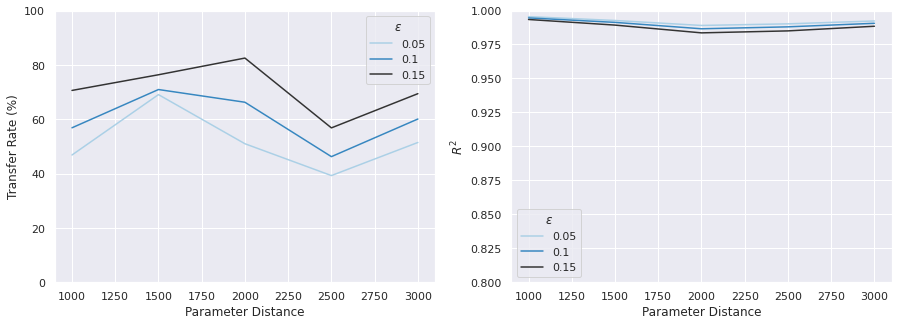

In [3]:
sns.set_theme()
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(ax=ax[0], data=data[data.param_dist != -1], x='param_dist', y='Transfer Rate (%)', hue=r'$\epsilon$', palette='Blues_d')
ax[0].set_ylim(0,100)
ax[0].set_xlabel('Parameter Distance')

sns.lineplot(ax=ax[1], data=data[data.param_dist != -1], x='param_dist', y='R2', hue=r'$\epsilon$', palette='Blues_d')
ax[1].set_ylim(0.8,1)
ax[1].set_xlabel('Parameter Distance')
ax[1].set_ylabel(r'$R^2$')

In [4]:
fig.savefig('param_dist_comparison.jpg', bbox_inches = 'tight', pad_inches = 0, format='jpg', dpi=300)

Text(0.5, 0, '$\\epsilon$')

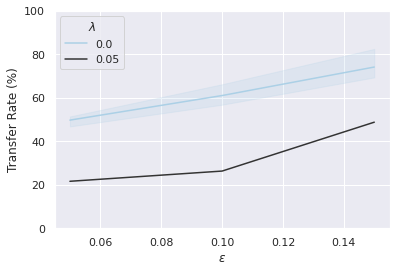

In [5]:
#Next Plot
ndata = data[data.param_dist != 1500]
ndata = ndata[ndata.param_dist != 2500]
ndata.loc[ndata['param_dist']!=-1, 'param_dist'] = 0.00
ndata.loc[ndata['param_dist']==-1, 'param_dist'] = 0.05
ndata = ndata.rename(columns={'param_dist': r'$\lambda$'})

fig, ax = plt.subplots()
sns.lineplot(ax = ax, data=ndata, x=r'$\epsilon$', y='Transfer Rate (%)', hue=r'$\lambda$', palette='Blues_d')
plt.ylim(0,100)
plt.xlabel(r'$\epsilon$')

In [6]:
fig.savefig('CNN_transfer_rates.jpg', bbox_inches = 'tight', pad_inches = 0, format='jpg', dpi=300)